In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for (i, b) in enumerate(lepping_db.all()) if i % 12 == 0], mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

05/14/2019 22:22:12 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
05/14/2019 22:22:13 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
05/14/2019 22:22:15 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control02/func/sub-control02_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
05/14/2019 22:22:17 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control

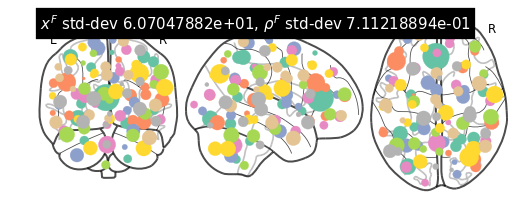

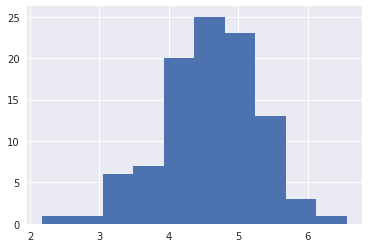

(<nilearn.plotting.displays.OrthoProjector at 0x7f3947df0eb8>,
 tensor([[-3.1753e+01, -8.1960e+01, -9.0662e+00],
         [ 4.8332e+01,  1.4747e+01, -1.0041e+00],
         [-2.2931e+00,  3.3837e+01,  1.2580e+01],
         [-1.8048e+01, -3.5278e+01,  4.4494e+01],
         [ 2.0381e+01, -5.4456e+01, -5.1850e+01],
         [ 3.7387e+01, -5.2115e+01,  5.5424e+01],
         [-2.5253e+01, -4.0396e+01, -3.2570e+01],
         [ 3.6913e+00,  2.8269e+01,  6.0128e+01],
         [-2.8514e+01, -6.1862e+00,  6.2967e+00],
         [ 2.4464e+01, -5.3119e+01,  1.3779e+01],
         [ 1.8714e+01, -6.0658e+01, -1.4424e+01],
         [ 4.7479e+01, -3.1536e+00,  5.0294e+01],
         [-3.9810e+01, -4.7208e+01,  5.5586e+01],
         [ 1.0909e+01, -6.7784e+01,  5.2516e+01],
         [-2.5910e+01, -6.7107e+00,  3.2701e+01],
         [-4.1115e+01,  3.9404e+01, -6.2125e+00],
         [ 2.3436e+01,  5.9544e+01,  1.5030e+01],
         [ 3.9495e+01, -8.2210e+01,  1.5704e+01],
         [ 3.8562e+01,  3.9475e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 2e-3, 'p': 1e-4}, log_level=logging.INFO, num_particles=2,
                    batch_size=3, use_cuda=True, checkpoint_steps=100, blocks_batch_size=2, patience=100)

05/14/2019 22:25:45 [Epoch 1] (17702ms) Posterior free-energy 2.95058720e+07 = KL from prior 4.97562109e+04 - log-likelihood -2.94561120e+07
05/14/2019 22:25:45 Saving checkpoint...
05/14/2019 22:26:03 [Epoch 2] (17620ms) Posterior free-energy 2.91439320e+07 = KL from prior 3.10707598e+04 - log-likelihood -2.91128600e+07
05/14/2019 22:26:20 [Epoch 3] (17675ms) Posterior free-energy 2.88097440e+07 = KL from prior 2.84569570e+04 - log-likelihood -2.87812860e+07
05/14/2019 22:26:38 [Epoch 4] (17708ms) Posterior free-energy 2.85173900e+07 = KL from prior 2.60984902e+04 - log-likelihood -2.84912900e+07
05/14/2019 22:26:56 [Epoch 5] (17686ms) Posterior free-energy 2.82241680e+07 = KL from prior 2.32524531e+04 - log-likelihood -2.82009160e+07
05/14/2019 22:27:13 [Epoch 6] (17690ms) Posterior free-energy 2.79148720e+07 = KL from prior 2.07352578e+04 - log-likelihood -2.78941380e+07
05/14/2019 22:27:31 [Epoch 7] (17695ms) Posterior free-energy 2.76797020e+07 = KL from prior 1.84596113e+04 - log

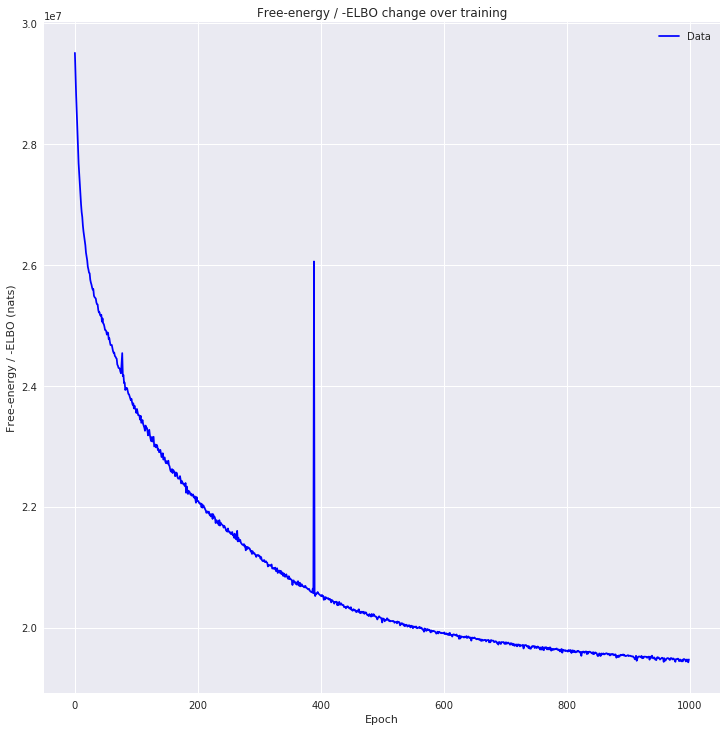

In [9]:
utils.plot_losses(losses)

In [10]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [11]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [12]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

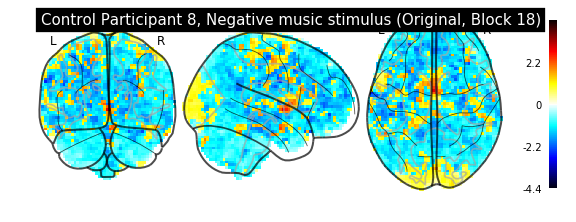

05/15/2019 03:20:17 Reconstruction Error (Frobenius Norm): 4.66246613e+02 out of 5.31274170e+02


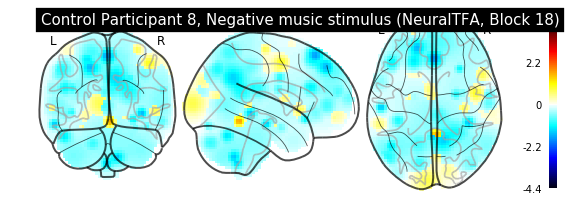

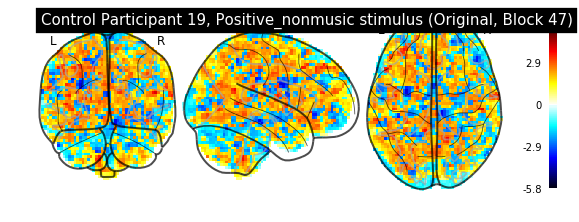

05/15/2019 03:20:20 Reconstruction Error (Frobenius Norm): 7.89552551e+02 out of 8.59460815e+02


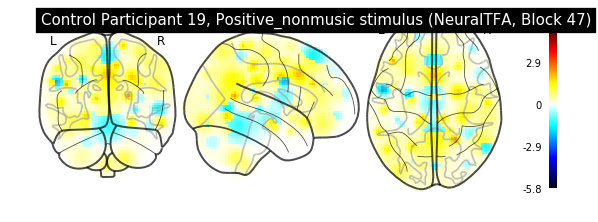

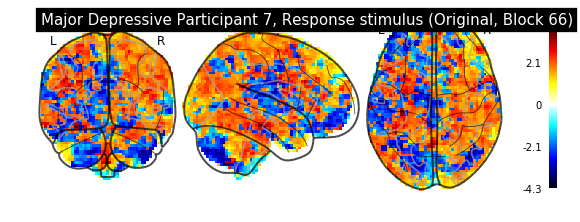

05/15/2019 03:20:23 Reconstruction Error (Frobenius Norm): 2.46077652e+02 out of 2.70133728e+02


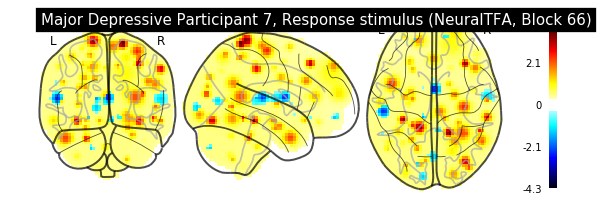

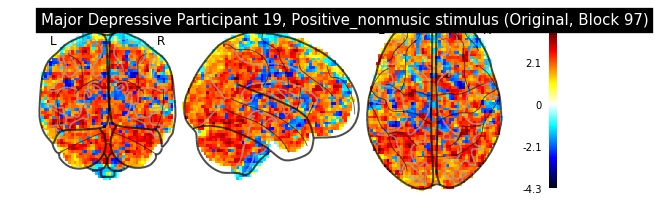

05/15/2019 03:20:26 Reconstruction Error (Frobenius Norm): 7.68638794e+02 out of 8.42435974e+02


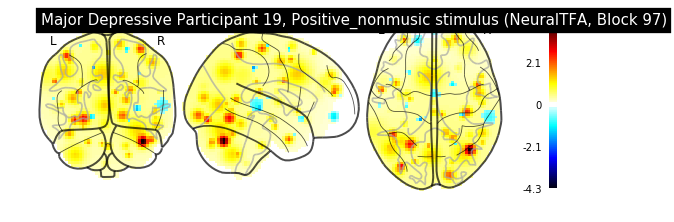

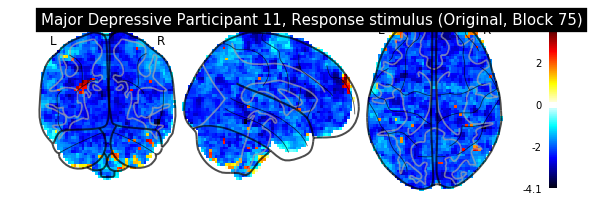

05/15/2019 03:20:28 Reconstruction Error (Frobenius Norm): 1.93566650e+02 out of 3.38348602e+02


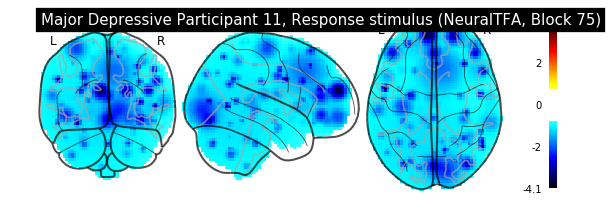

In [13]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which sh

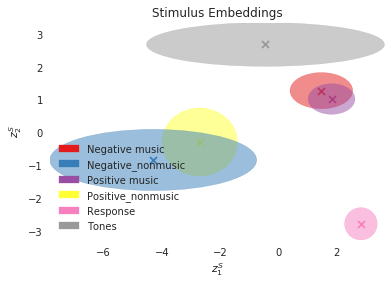

In [14]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:29 'c' argument looks like a single numeric RGB or RGBA sequence, which sh

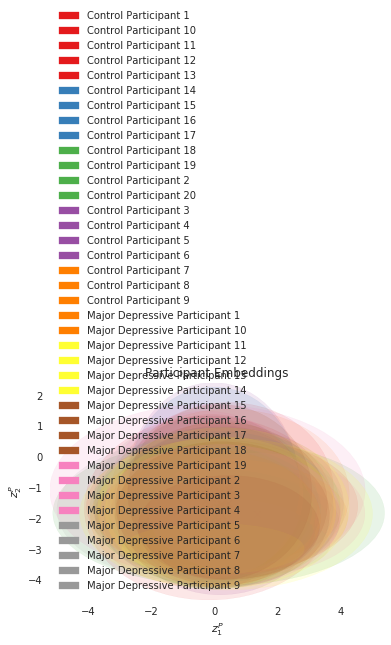

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

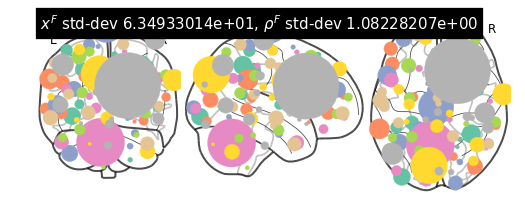

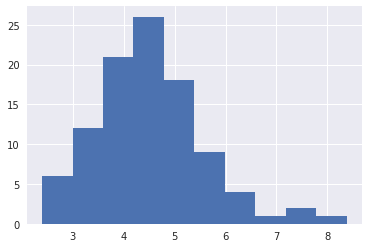

(<nilearn.plotting.displays.OrthoProjector at 0x7f392c595550>,
 tensor([[-38.1319, -92.7576,  -6.8633],
         [ 50.8979,  22.0089,   1.6668],
         [ -4.3018,  39.6731,  16.3732],
         [-27.4818, -36.0034,  42.1901],
         [ 22.9734, -53.3412, -52.8353],
         [ 34.9377, -47.5826,  47.0987],
         [-27.1841, -43.9112, -29.6410],
         [  6.5183,  31.3618,  57.9667],
         [-30.3098,  -9.2504,   5.5674],
         [ 30.2283, -47.9087,  16.2259],
         [ 20.1633, -61.2486,  -9.8728],
         [ 43.1296,  -2.6399,  46.4692],
         [-43.8425, -40.7746,  62.4453],
         [ 15.9785, -71.3840,  53.4189],
         [-26.1335,  -9.0110,  34.5936],
         [-49.8421,  42.0102,  -2.8225],
         [ 23.4306,  58.0968,  14.9889],
         [ 38.8070, -81.6388,  10.8433],
         [ 43.4972,  41.0226,  22.1735],
         [-65.6501, -43.8604,   0.7580],
         [ 27.6405,  21.8149, -12.6392],
         [-48.2851,  25.9183,  28.6395],
         [ 37.1971, -85.4864, -11.7

In [16]:
dtfa.visualize_factor_embedding()

In [17]:
dtfa.average_reconstruction_error()

05/15/2019 03:20:36 Average reconstruction error (MSE): 7.26719014e-01
05/15/2019 03:20:36 Average data norm (Euclidean): 9.60465657e-01
05/15/2019 03:20:36 Percent average reconstruction error: 0.294583


(0.7267190140379407, 0.9604656573615109, 0.002945828587069474)

In [18]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

05/15/2019 03:20:36 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:36 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:36 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/15/2019 03:20:36 'c' argument looks like a single numeric RGB or RGBA sequence, which sh

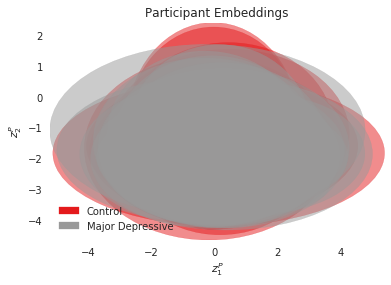

In [19]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)